In [1]:
from hw2script import Hw2Script as HWS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.cross_decomposition import PLSRegression
from sklearn.cross_decomposition import PLSCanonical

In [2]:
df=pd.read_csv('data/costs/insurance.csv')

In [4]:
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

In [7]:
def stats_metrics_var(df,variable,decimals=2):
        df_variable= df[variable]
        stats = df_variable.describe()
        stats.loc['var'] = df_variable.var().tolist()
        stats.loc['skew'] = df_variable.skew().tolist()
        return stats.round(decimals)

In [6]:
hw = HWS(df)

In [8]:
print(stats_metrics_var(df,['age','bmi'],2).to_latex())

\begin{tabular}{lrr}
\toprule
{} &      age &      bmi \\
\midrule
count &  1338.00 &  1338.00 \\
mean  &    39.21 &    30.66 \\
std   &    14.05 &     6.10 \\
min   &    18.00 &    15.96 \\
25\%   &    27.00 &    26.30 \\
50\%   &    39.00 &    30.40 \\
75\%   &    51.00 &    34.69 \\
max   &    64.00 &    53.13 \\
var   &   197.40 &    37.19 \\
skew  &     0.06 &     0.28 \\
\bottomrule
\end{tabular}



## Univariate Analysis:

## Medical Charges

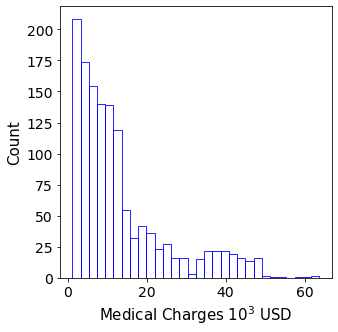

In [5]:
plt.figure(figsize=(5,5))
x=sns.histplot(data=df,x=df['charges']/10**3,color='b',fill=False)
plt.xlabel('Medical Charges $10^3$ USD',size=15)
plt.ylabel('Count',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.savefig('hist_charges.pdf',bbox_inches='tight')

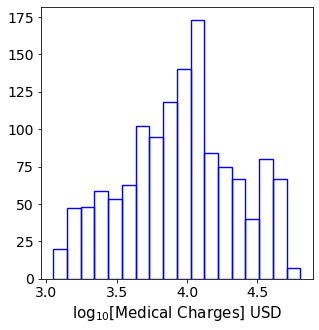

In [164]:
plt.figure(figsize=(5,5))
x=sns.histplot(data=df,x=np.log10(df['charges']),color='b',fill=False)
plt.xlabel('$\log_{10}$[Medical Charges] USD',size=15)
plt.ylabel('',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.savefig('log_medical_charges.pdf',bbox_inches='tight')

In [68]:
df['log_charges']=np.log10(df['charges'])

In [72]:
df

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,4.227499
1,18,male,33.770,1,no,southeast,1725.55230,3.236928
2,28,male,33.000,3,no,southeast,4449.46200,3.648308
3,33,male,22.705,0,no,northwest,21984.47061,4.342116
4,32,male,28.880,0,no,northwest,3866.85520,3.587358
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,4.025328
1334,18,female,31.920,0,no,northeast,2205.98080,3.343602
1335,18,female,36.850,0,no,southeast,1629.83350,3.212143
1336,21,female,25.800,0,no,southwest,2007.94500,3.302752


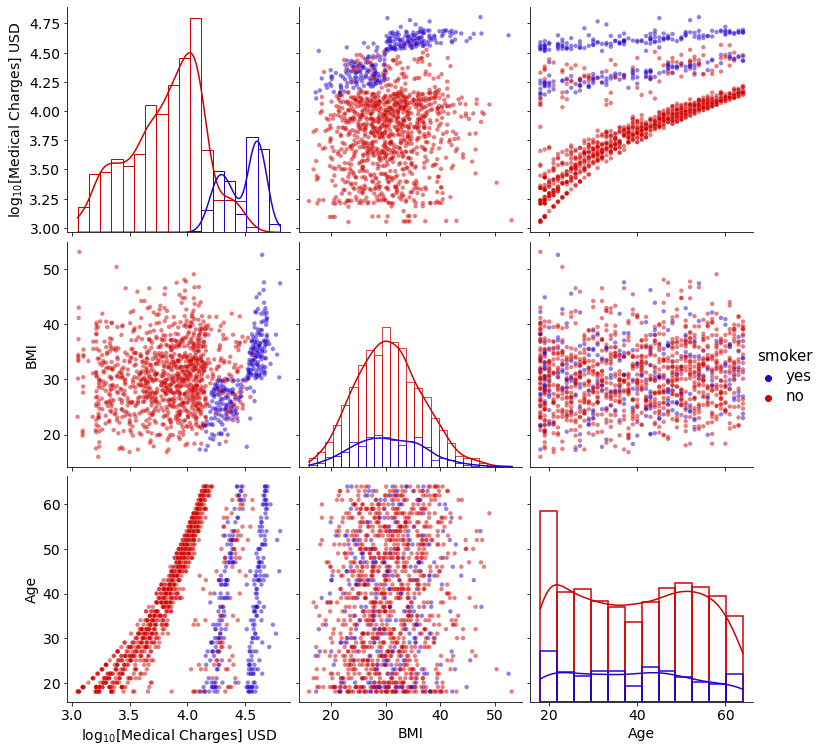

In [86]:
g=sns.pairplot(df[['log_charges','bmi','age','smoker']],hue='smoker',
               diag_kind="hist",diag_kws=dict(fill=False,palette=['#2600cf','#cf0000'],kde='True'),
               palette=['#2600cf','#cf0000'],
               markers='.',plot_kws={'s':80,'linewidth':0.2,'c':['#2600cf','#cf0000'],'alpha':0.5},height=3.5)
g.axes[2,0].set_xlabel('$\log_{10}$[Medical Charges] USD',size=14)
g.axes[0,0].set_ylabel('$\log_{10}$[Medical Charges] USD',size=14)
g.axes[2,1].set_xlabel('BMI',size=14)
g.axes[1,0].set_ylabel('BMI',size=14)
g.axes[2,2].set_xlabel('Age',size=14)
g.axes[2,0].set_ylabel('Age',size=14)

plt.setp(g._legend.get_texts(), fontsize=15)
plt.setp(g._legend.get_title(), fontsize=15)

plt.savefig('pair_plot_variables.pdf',bbox_inches='tight')

In [ ]:
plt.subplot(1,2,1)
x=sns.histplot(data=df,x=df['charges']/10**3,color='k')
plt.xlabel('Medical Charges in $10^3$ Dollars',size=15)
plt.ylabel('Count',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.savefig('hist_charges.pdf',bbox_inches='tight')

In [306]:
df['log_charges']=np.log10(df['charges'])

In [310]:
stats_metrics_var(df,'charges',decimals=2)

count    1.338000e+03
mean     1.327042e+04
std      1.211001e+04
min      1.121870e+03
25%      4.740290e+03
50%      9.382030e+03
75%      1.663991e+04
max      6.377043e+04
var      1.466524e+08
skew     1.520000e+00
Name: charges, dtype: float64

# Qualitative Variables:

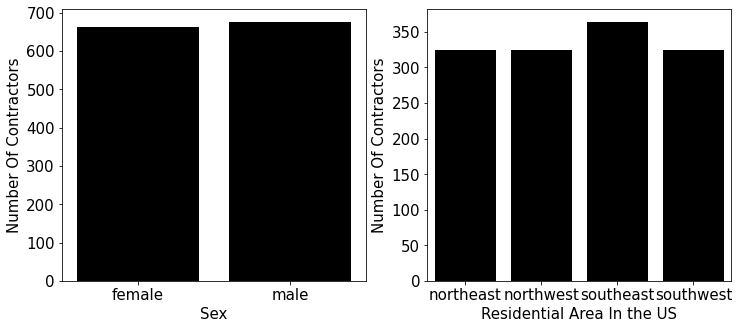

In [36]:
plt.figure(figsize=(12,5))
df_sex = df.groupby(['sex']).size()
plt.subplot(1,2,1)
sns.barplot(y=df_sex.values,x=df_sex.index,color='k')
plt.tick_params(labelsize=15)
plt.xlabel('Sex',size=15)
plt.ylabel('Number Of Contractors',size=15)
plt.subplot(1,2,2)
df_region = df.groupby('region').size()
sns.barplot(data=df,y=df_region.values,x=df_region.index,color='k')
plt.tick_params(labelsize=15)
plt.ylabel('Number Of Contractors',size=15)
plt.xlabel('Residential Area In the US',size=15)

plt.savefig('figure/sexResidentialBarPlot.pdf',bbox_inches='tight')

Text(0.5, 0, 'Smoker')

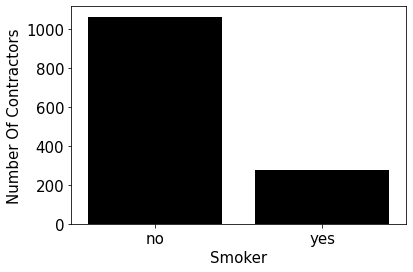

In [4]:
df_smoker = df.groupby('smoker').size()
sns.barplot(y=df_smoker.values,x=df_smoker.index,color='k')
plt.ylabel('Number Of Contractors',size=15)
plt.xlabel('Smoker',size=15)
#g.text(row.name,row.tip,round(df_smoker.values,2), color='black', ha="center")
#plt.savefig('figure/smokerBarPlot.pdf',bbox_inches='tight')

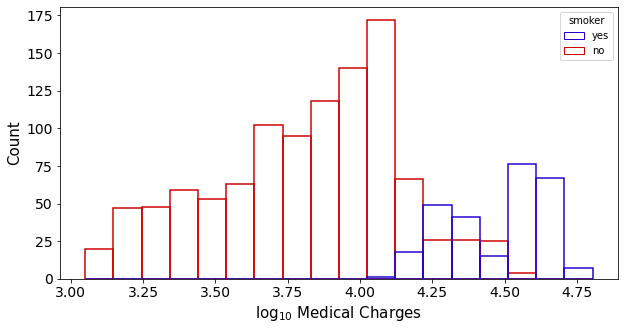

In [73]:
plt.figure(figsize=(10,5))
x=sns.histplot(data=df,x=np.log10(df['charges']),hue='smoker',palette=['#2600cf','#cf0000'],fill=False)
plt.xlabel('Smoker',size=16)
plt.xlabel('$\log_{10}$ Medical Charges',size=15)
plt.ylabel('Count',size=15)



plt.savefig('figure/smokerCharges.pdf',bbox_inches='tight')
plt.show()

In [305]:
df.groupby('smoker').size()

smoker
no     1064
yes     274
dtype: int64

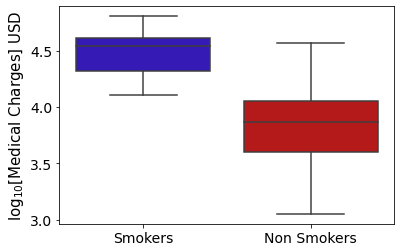

In [285]:
sns.boxplot(data=df,x='smoker',y=np.log10(df['charges']),palette=['#2600cf','#cf0000'])
plt.xlabel('')
plt.ylabel('$\log_{10}$[Medical Charges] USD',size=15)
plt.xticks(ticks=[0,1],labels=['Smokers','Non Smokers'])
plt.savefig('smoke_box_plot.pdf',bbox_inches='tight')
plt.show()

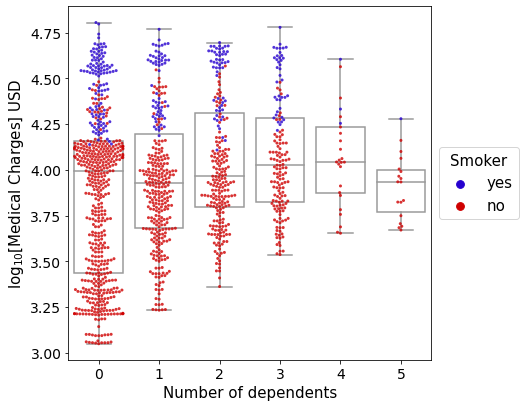

In [54]:
plt.figure(figsize=(6.5,6.5))
g=sns.boxplot(data=df,y=np.log10(df['charges']),x='children',color='white')

ax = sns.swarmplot(x='children', y=np.log10(df['charges']), 
                   data=df,s=3, 
                   hue='smoker',palette=['#2600cf','#cf0000'],alpha=0.8)

plt.xlabel('Number of dependents',size=15)
plt.ylabel('$\log_{10}$[Medical Charges] USD',size=15)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5),title_fontsize='15',fontsize=15,title='Smoker')
plt.savefig('boxplot_dependents_2.pdf',bbox_inches='tight')

/home/emmanuel/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/emmanuel/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


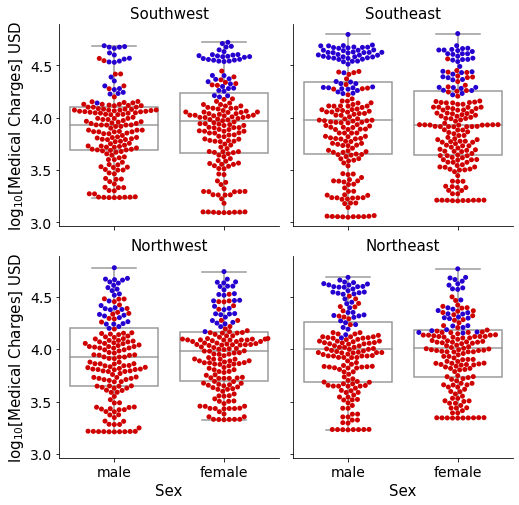

In [38]:
g = sns.FacetGrid(df,col="region",col_wrap=2,
                  col_order=df['region'].unique(),height=3.5)
#g.map(sns.histplot,'charges',fill=False,kde=True,log_scale=True)
g.map(sns.boxplot,'sex',y=np.log10(df['charges']),color='white')
g.map(sns.swarmplot,'sex',y=np.log10(df['charges']),hue=df['smoker'],palette=['#2600cf','#cf0000'])
g.set_axis_labels("Sex", "$\log_{10}$[Medical Charges] USD",size=15)

axes = g.axes.flatten()
axes[0].set_title("Southwest",size=15)
axes[1].set_title("Southeast",size=15)
axes[2].set_title("Northwest",size=15)
axes[3].set_title("Northeast",size=15)
plt.savefig('sex_region_boxplot_2.pdf',bbox_inches='tight')
plt.show()

In [ ]:
sns.stripplot(data=df,y=np.log10(df['charges']),x='sex',jitter=0.4,size=3.5,color='k')
plt.xlabel('Sex',size=15)
plt.ylabel('Medical Charges ($10^3$ Dollars)',size=15)

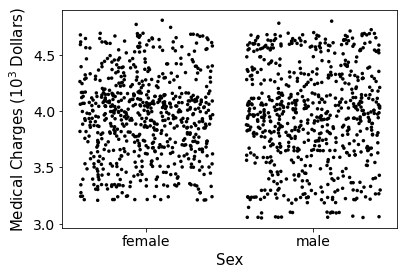

In [80]:
sex_palette=['#91006f','#00917e']
sns.stripplot(data=df,y=np.log10(df['charges']),x='sex',jitter=0.4,size=3.5,color='k')
plt.xlabel('Sex',size=15)
plt.ylabel('Medical Charges ($10^3$ Dollars)',size=15)
plt.savefig('strip_sex.pdf',bbox_inches='tight')

In [85]:
df_southwest=df.loc[df['region']=='southwest']
df_southeast=df.loc[df['region']=='southeast']
df_northwest=df.loc[df['region']=='northwest']
df_northeast=df.loc[df['region']=='northeast']

In [91]:
metrics_sw = stats_metrics_var(df_southwest,'charges',decimals=2)
metrics_se = stats_metrics_var(df_southeast,'charges',decimals=2)
metrics_nw = stats_metrics_var(df_northwest,'charges',decimals=2)
metrics_ne = stats_metrics_var(df_northeast,'charges',decimals=2)

In [94]:
metrics_nw

count    3.250000e+02
mean     1.241758e+04
std      1.107228e+04
min      1.621340e+03
25%      4.719740e+03
50%      8.965800e+03
75%      1.471174e+04
max      6.002140e+04
var      1.225953e+08
skew     1.680000e+00
kurt     2.630000e+00
Name: charges, dtype: float64

In [92]:
metrics_sw

count    3.250000e+02
mean     1.234694e+04
std      1.155718e+04
min      1.241560e+03
25%      4.751070e+03
50%      8.798590e+03
75%      1.346252e+04
max      5.259083e+04
var      1.335684e+08
skew     1.680000e+00
kurt     2.110000e+00
Name: charges, dtype: float64

In [93]:
metrics_se

count    3.640000e+02
mean     1.473541e+04
std      1.397110e+04
min      1.121870e+03
25%      4.440890e+03
50%      9.294130e+03
75%      1.952629e+04
max      6.377043e+04
var      1.951916e+08
skew     1.250000e+00
kurt     5.200000e-01
Name: charges, dtype: float64

In [ ]:
df['log_charges'] = np.log10(df['charges'])

In [ ]:
g=sns.pairplot(df_1[['bmi','age','charges']],hue='smoker',
               diag_kind="hist",diag_kws=dict(fill=False,palette=,kde='True'),palette=,
               markers='.',plot_kws={'s':80,'linewidth':0.2,'c':[],'alpha':0.5})
g.axes[2,0].set_xlabel('Life Expectation',size=14)
g.axes[0,0].set_ylabel('Life Expectation',size=14)
g.axes[2,1].set_xlabel('GDP Per capita',size=14)
g.axes[1,0].set_ylabel('GDP Per capita',size=14)
g.axes[2,2].set_xlabel('Population Size',size=14)
g.axes[2,0].set_ylabel('Population Size',size=14)


plt.savefig('pair_plot_variables.pdf',bbox_inches='tight')

## Quantitative Variables

In [238]:
df.groupby(['children','smoker']).describe()['charges']

count          mean           std          min           25%  \
children smoker                                                                 
0        no      459.0   7611.793335   5858.529189   1121.87390   2259.522025   
         yes     115.0  31341.363954  11596.678789  13747.87235  20057.034600   
1        no      263.0   8303.109350   5987.135990   1711.02680   4447.807900   
         yes      61.0  31822.654334  11813.013604  15359.10450  20773.627750   
2        no      185.0   9493.093674   6456.112895   2304.00220   5124.188700   
         yes      55.0  33844.235755  11311.748471  12829.45510  22179.710000   
3        no      118.0   9614.519391   5159.770864   3443.06400   6117.122650   
         yes      39.0  32724.915268  11412.853656  16420.49455  22883.421325   
4        no       22.0  12121.344408   7466.220703   4504.66240   7310.926950   
         yes       3.0  26532.276933  11952.285332  17942.10600  19707.292400   
5        no       17.0   8183.845556   2911.244983   4687.79700   5615.369000   
         yes       1.0  19023.260000           NaN  19023.26000  19023.260000   

                          50%           75%          max  
children smoker                                           
0        no       6185.320800  11835.471150  30259.99556  
         yes     33900.653000  39202.221650  63770.42801  
1        no       7050.642000   9878.837850  35160.13457  
         yes     34806.467700  41034.221400  58571.07448  
2        no       7726.854000  11187.656700  36910.60803  
         yes     38344.566000  43855.121200  49577.66240  
3        no       8530.145725  11925.807650  30063.58055  
         yes     32787.458590  41445.264750  60021.39897  
4        no      10996.190500  14033.087462  36580.28216  
         yes     21472.478800  30827.362400  40182.24600  
5        no       8582.302300   9788.865900  14478.33015  
         yes     19023.260000  19023.260000  19023.26000

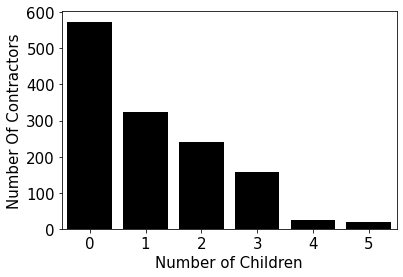

In [54]:
df_children = df.groupby('children').size()
sns.barplot(y=df_children.values,x=df_children.index,color='k')
plt.tick_params(labelsize=15)
plt.ylabel('Number Of Contractors',size=15)
plt.xlabel('Number of Children',size=15)
plt.savefig('figure/childrenBarPlot.pdf',bbox_inches='tight')

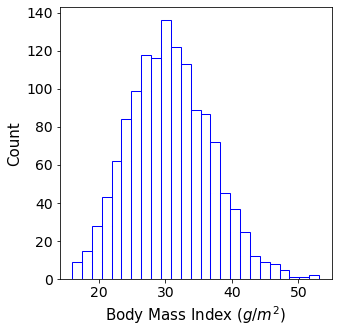

In [169]:
plt.figure(figsize=(5,5))
x=sns.histplot(df['bmi'],color='b',fill=False)
plt.xlabel('Body Mass Index ($g / m ^ 2$)',size=15)
plt.ylabel('Count',size=15)


#plt.xlabel('Ages (years)',size=15)
#plt.ylabel('',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))

plt.savefig('BMI_hist.pdf',bbox_inches='tight')

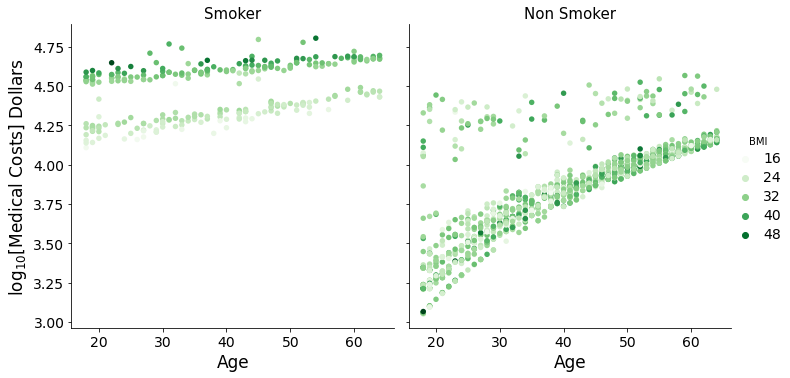

In [284]:
g=sns.relplot(data=df,x='age',y=np.log10(df['charges']),col='smoker',
              linewidth=0,hue='bmi',palette='Greens',marker='o',s=30)
g._legend.set_title('BMI')
#replace labels
plt.setp(g._legend.get_texts(), fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
g.set_axis_labels('Age','$\log_{10}$[Medical Costs] Dollars',size=17)
#leg.set_bbox_to_anchor([1.1, 0.5])
plt.setp(g._legend.get_texts(), fontsize=14)
for ax, title in zip(g.axes.flat, ['Smoker', 'Non Smoker']):
    ax.set_title(title,size=15)
leg = g._legend

plt.savefig('isurance_fee_vs_age.pdf',bbox_inches='tight')

In [146]:
df.groupby('children').describe()['charges']['count']

children
0    574.0
1    324.0
2    240.0
3    157.0
4     25.0
5     18.0
Name: count, dtype: float64

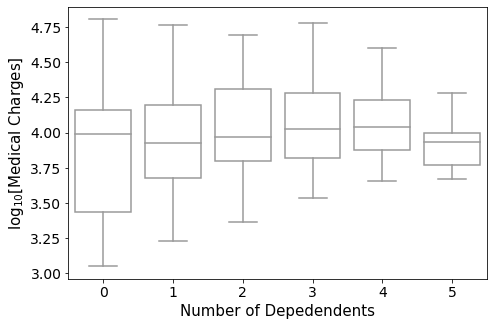

In [21]:
plt.figure(figsize=(7.5,5))
g=sns.boxplot(data=df,y=np.log10(df['charges']),x='children',color='white')
'''
ax = sns.swarmplot(x='region', y=np.log10(df['charges']), 
                   data=df,s=5, 
                   palette=['#91006f','#00917e'],alpha=0.8)
'''
plt.xlabel('Number of Depedendents',size=15)
plt.ylabel('$\log_{10}$[Medical Charges]',size=15)
#plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5),title_fontsize='15',fontsize=15,title='Sex')
plt.savefig('boxplot_number_dependents.pdf',bbox_inches='tight')

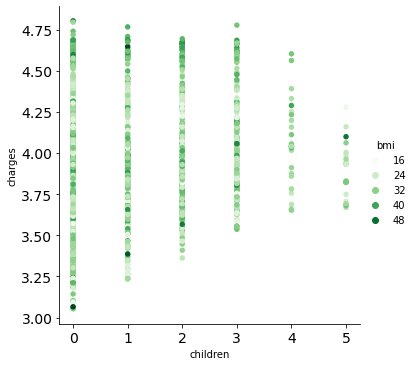

In [14]:
g=sns.relplot(data=df,x='children',y=np.log10(df['charges']),
              linewidth=0,hue='bmi',palette='Greens',marker='o',s=30)

## Encoding Categorical Variables:

In [4]:
df['smoker'].replace({'no': 0, 'yes': 1}, inplace=True)
df['region'].replace({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}, inplace=True)
df['sex'].replace({'male':0, 'female':1}, inplace=True)

## Correlation And  Variance Inflation Factor (VIF)

In [55]:
X = df[['bmi','smoker','age']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [56]:
vif

,VIF Factor
0,7.667212
1,1.246501
2,7.458655


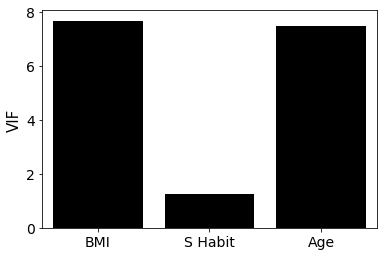

In [66]:
sns.barplot(x=['BMI','S Habit','Age'],y=vif['VIF Factor'].values,color='k')
plt.ylabel('VIF',size=15)
plt.savefig('vif.pdf',bbox_inches='tight')

## Performing Regression

In [7]:
df['smoker_bmi']=df['smoker']*df['bmi']
hw.define_variables(df[['age','smoker','bmi','children','region','sex','smoker_bmi']],df['charges'],apply_sc=False)

In [8]:
hw.define_train_test_set((0.75,0.25))

In [16]:
df_X_train=pd.DataFrame(hw.X_train,columns=['age','smoker','bmi','children','region','sex','smoker_bmi'])
df_X_test=pd.DataFrame(hw.X_test,columns=['age','smoker','bmi','children','region','sex','smoker_bmi'])

In [90]:
linear = hw.model_select('linear_reg')
linear.fit(df_X_train[['smoker_bmi','age']].values,hw.Y_train)

Pipeline(memory=None,
         steps=[('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [91]:
score= linear.score(df_X_test[['smoker_bmi','age']],y=hw.Y_test)
y= linear.predict(df_X_test[['smoker_bmi','age']])
print(mse(hw.Y_test,y)**0.5)
print(score)

5070.28052917115
0.8296272087623817


<StemContainer object of 3 artists>

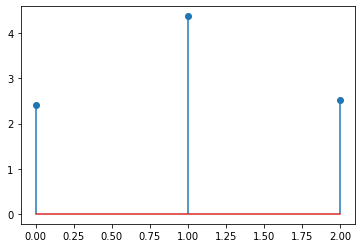

In [30]:
plt.stem(np.log10(linear['linearregression'].coef_[0]))
plt.xticks([])

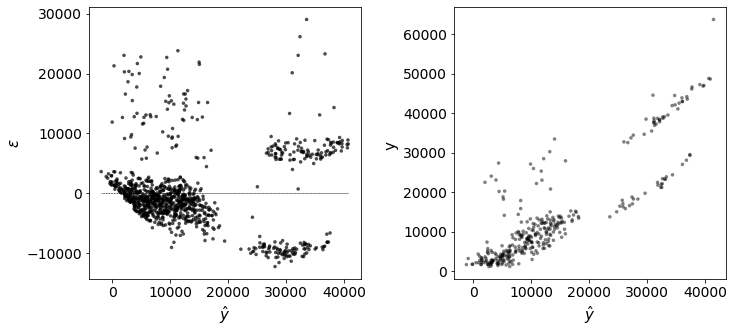

In [59]:
linear = hw.model_select('linear_reg')
linear.fit(df_X_train[['age','smoker','bmi']].values,hw.Y_train)
y_prediction=linear.predict(df_X_train[['age','smoker','bmi']].values)
residuals =hw.Y_train-y_prediction
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
x=sns.scatterplot(x=y_prediction[:,0],y=residuals[:,0],
                edgecolor='none',s=50,marker='.',color='k',alpha=0.7)

plt.plot(y_prediction[:,0],0*y_prediction[:,0],'--',color='k',linewidth=0.5,alpha=0.6)

plt.xlabel('$\hat{y}$',size=15)
plt.ylabel('$\epsilon$',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))

plt.subplot(1,2,2)
y_prediction = linear.predict(df_X_test[['age','smoker','bmi']].values)
rmse=mse(hw.Y_test[:,0],y_prediction[:,0])**0.5
r2 = linear.score(df_X_test[['age','smoker','bmi']].values,hw.Y_test[:,0])                                    
x=sns.scatterplot(x=y_prediction[:,0],y=hw.Y_test[:,0],edgecolor='none',s=50,marker='.',color='k',alpha=0.5)
plt.xlabel('$\hat{y}$',size=15)
plt.ylabel('y ',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.savefig('residuals.pdf',bbox_inches='tight')

In [24]:
print(f"R2: {r2}")
print(f"RMSE: {rmse}")

R2: 0.7622843807642006
RMSE: 5989.088470883203


R2: 0.7481369286464893
RMSE: 18081.340669316196


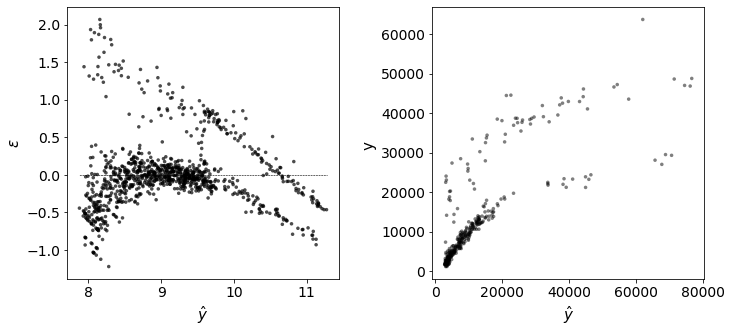

In [31]:
linear = hw.model_select('linear_reg')
linear.fit(df_X_train[['age','smoker','bmi']].values,np.log(hw.Y_train))
y_prediction=linear.predict(df_X_train[['age','smoker','bmi']].values)
residuals =np.log(hw.Y_train)-y_prediction
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
x=sns.scatterplot(x=y_prediction[:,0],y=residuals[:,0],
                edgecolor='none',s=50,marker='.',color='k',alpha=0.7)

plt.plot(y_prediction[:,0],0*y_prediction[:,0],'--',color='k',linewidth=0.5,alpha=0.6)

plt.xlabel('$\hat{y}$',size=15)
plt.ylabel('$\epsilon$',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))

plt.subplot(1,2,2)
y_prediction = linear.predict(df_X_test[['age','smoker','bmi']].values)
rmse=mse(hw.Y_test[:,0],y_prediction[:,0])**0.5
r2 = linear.score(df_X_test[['age','smoker','bmi']].values,np.log(hw.Y_test[:,0]))                                    
x=sns.scatterplot(x=np.exp(y_prediction[:,0]),y=hw.Y_test[:,0],edgecolor='none',s=50,marker='.',color='k',alpha=0.5)
plt.xlabel('$\hat{y}$',size=15)
plt.ylabel('y ',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
print(f"R2: {r2}")
print(f"RMSE: {rmse}")
plt.savefig('residuals_2.pdf',bbox_inches='tight')

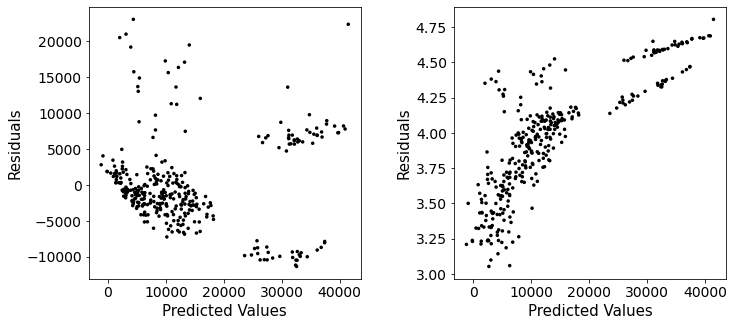

In [60]:
linear = hw.model_select('linear_reg')
linear.fit(df_X_train[['age','smoker','bmi']],hw.Y_train)
y_prediction=linear.predict(df_X_test[['age','smoker','bmi']],)
residuals =hw.Y_test-y_prediction
plt.figure(figsize=(12,5))
R2_linear = linear.score(df_X_test[['age','smoker','bmi']],hw.Y_test)
rmse_linear = mse(hw.Y_test,y_prediction)**0.5
plt.subplot(1,2,1)
x=sns.scatterplot(x=y_prediction[:,0],y=residuals[:,0],edgecolor='none',s=50,marker='.',color='k')
plt.xlabel('Predicted Values',size=15)
plt.ylabel('Residuals',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.subplot(1,2,2)

x=sns.scatterplot(x=y_prediction[:,0],y=np.log10(hw.Y_test[:,0]),edgecolor='none',s=50,marker='.',color='k')
plt.xlabel('Predicted Values',size=15)
plt.ylabel('Residuals',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))

In [30]:
print(f"R2: {R2_linear}")
print(f"RMSE: {rmse_linear}")

R2: 0.7622843807642006
RMSE: 5989.088470883203


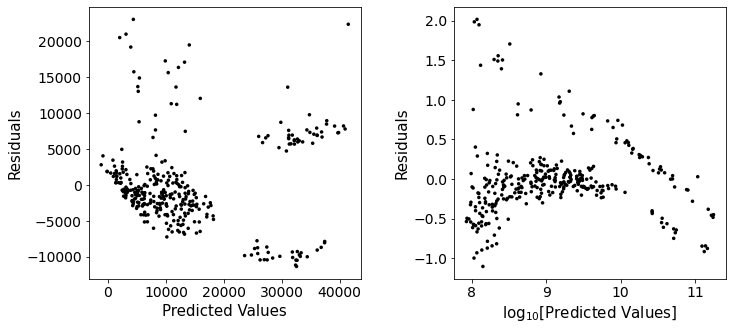

In [145]:
linear = hw.model_select('linear_reg')
linear.fit(df_X_train[['age','smoker','bmi']].values,hw.Y_train)
y_prediction=linear.predict(df_X_test[['age','smoker','bmi']].values)
residuals =hw.Y_test-y_prediction
plt.figure(figsize=(12,5))
R2_linear = linear.score(df_X_test[['age','smoker','bmi']].values,hw.Y_test)
rmse_linear = mse(hw.Y_test,y_prediction)**0.5
plt.subplot(1,2,1)
x=sns.scatterplot(x=y_prediction[:,0],y=residuals[:,0],edgecolor='none',s=50,marker='.',color='k')
plt.xlabel('Predicted Values',size=15)
plt.ylabel('Residuals',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))

linear_log = hw.model_select('linear_reg')
linear_log.fit(df_X_train[['age','smoker','bmi']].values,np.log(hw.Y_train))
y_prediction=linear_log.predict(df_X_test[['age','smoker','bmi']].values)
residuals =np.log(hw.Y_test)-y_prediction
plt.subplot(1,2,2)
x=sns.scatterplot(x=y_prediction[:,0],y=residuals[:,0],edgecolor='none',s=50,marker='.',color='k')
plt.xlabel('$\log_{10}$[Predicted Values]',size=15)
plt.ylabel('Residuals',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
R2_log = linear_log.score(df_X_test[['age','smoker','bmi']].values,np.log(hw.Y_test))
rmse_log = mse(hw.Y_test,np.exp(y_prediction))**0.5
plt.savefig('residuals.pdf',bbox_inches='tight')
plt.show()

In [47]:
var_array = [['age','smoker','bmi'],['age','smoker','bmi','children'],
             ['age','smoker','bmi','children','region'],
             ['age','smoker','bmi','children','region','sex']]

r2_cv5_vector = []
rmse_cv5_vector = []

r2_cv10_vector = []
rmse_cv10_vector = []
for variables in var_array:    
    linear_regression = hw.model_select('linear_reg')


    r2_cv5,rmse_cv5=hw.model_cv(5,linear_regression,df_X_train[variables],hw.Y_train)
    r2_cv10,rmse_cv10=hw.model_cv(10,linear_regression,df_X_train[variables],hw.Y_train)
    
    r2_cv5_vector.append(r2_cv5)
    rmse_cv5_vector.append(rmse_cv5)
    
    r2_cv10_vector.append(r2_cv10)
    rmse_cv10_vector.append(rmse_cv10)

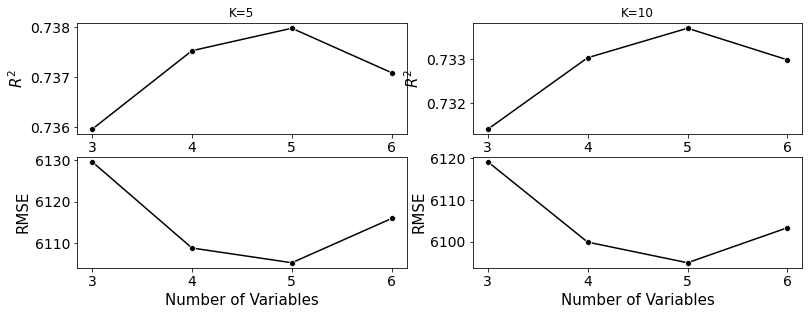

In [63]:
plt.figure(figsize=(13,4.5))
plt.subplot(2,2,1)
plt.title('K=5')
sns.lineplot(x=np.arange(3,7,1),y=r2_cv5_vector,color='k',marker='o')
plt.ylabel('$R^2$',size=15)
plt.xlabel('Number of Variables',size=15)
plt.xticks(np.arange(3,7,1))
plt.subplot(2,2,2)

sns.lineplot(x=np.arange(3,7,1),y=r2_cv10_vector,color='k',marker='o')
plt.ylabel('$R^2$',size=15)
plt.xlabel('Number of Variables',size=15)
plt.xticks(np.arange(3,7,1))

plt.title('K=10')
plt.xticks(np.arange(3,7,1))

plt.subplot(2,2,3)
sns.lineplot(x=np.arange(3,7,1),y=rmse_cv5_vector,color='k',marker='o')
plt.ylabel('RMSE',size=15)
plt.xlabel('Number of Variables',size=15)
plt.xticks(np.arange(3,7,1))
plt.subplot(2,2,4)
sns.lineplot(x=np.arange(3,7,1),y=rmse_cv10_vector,color='k',marker='o')
plt.ylabel('RMSE',size=15)
plt.xlabel('Number of Variables',size=15)
plt.xticks(np.arange(3,7,1))

plt.show()

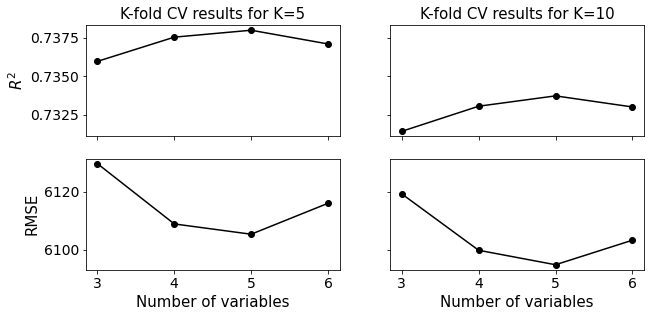

In [132]:

f, (ax1, ax2)=plt.subplots(2, 2, sharey='row',sharex='col')
f.set_figheight(4.5)
f.set_figwidth(10)
ax1[0].plot(np.arange(3,7,1),r2_cv5_vector,color='k',marker='o')
ax1[1].plot(np.arange(3,7,1),r2_cv10_vector,color='k',marker='o')
ax1[0].set_ylabel('$R^2$',size=15)
ax2[0].set_ylabel('RMSE',size=15)
ax1[0].set_title('K-fold CV results for K=5',size=15)
ax1[1].set_title('K-fold CV results for K=10',size=15)

ax2[0].plot(np.arange(3,7,1),rmse_cv5_vector,color='k',marker='o')
ax2[1].plot(np.arange(3,7,1),rmse_cv10_vector,color='k',marker='o')

ax2[0].set_xlabel('Number of variables',size=15)
ax2[1].set_xlabel('Number of variables',size=15)



#plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('CROSS_VALIDATION_VAR_SELECT.pdf',bbox_inches='tight')

In [136]:
rmse_cv5_vector
rmse_cv10_vector

[6119.218489629661, 6099.876628731893, 6094.911311232294, 6103.331471779712]

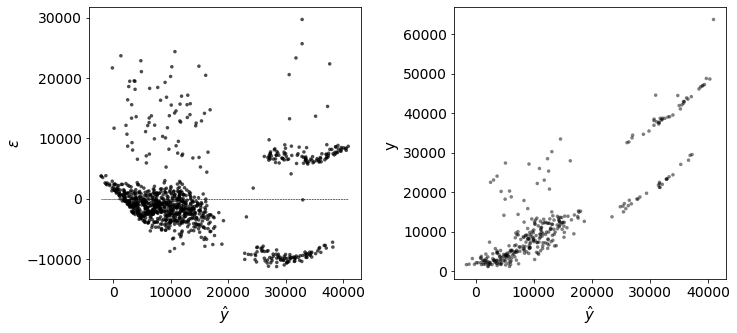

In [91]:
linear = hw.model_select('linear_reg')
linear.fit(df_X_train[['age','smoker','bmi','children','region']].values,hw.Y_train)
y_prediction=linear.predict(df_X_train[['age','smoker','bmi','children','region']].values)
residuals =hw.Y_train-y_prediction
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
x=sns.scatterplot(x=y_prediction[:,0],y=residuals[:,0],
                edgecolor='none',s=50,marker='.',color='k',alpha=0.7)

plt.plot(y_prediction[:,0],0*y_prediction[:,0],'--',color='k',linewidth=0.5,alpha=0.6)

plt.xlabel('$\hat{y}$',size=15)
plt.ylabel('$\epsilon$',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))

plt.subplot(1,2,2)
y_prediction = linear.predict(df_X_test[['age','smoker','bmi','children','region']].values)
rmse=mse(hw.Y_test[:,0],y_prediction[:,0])**0.5
r2 = linear.score(df_X_test[['age','smoker','bmi','children','region']].values,hw.Y_test[:,0])                                    
x=sns.scatterplot(x=y_prediction[:,0],y=hw.Y_test[:,0],edgecolor='none',s=50,marker='.',color='k',alpha=0.5)
plt.xlabel('$\hat{y}$',size=15)
plt.ylabel('y ',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.savefig('residuals.pdf',bbox_inches='tight')

In [92]:
print(f"R2: {r2}")
print(f"RMSE: {rmse}")

R2: 0.767001430584461
RMSE: 5929.369248802422


## Ridge Regression

In [110]:
X_train=StandardScaler().fit_transform(df_X_train[['age','smoker_bmi']].values)
X_test=StandardScaler().fit_transform(df_X_test[['age','smoker_bmi']].values)

In [119]:
lambda_values = np.arange(0,100,0.1)
r2_cv5_values,r2_cv10_values,rmse_cv5_values,rmse_cv10_values=hw.cross_val('ridge',lambda_values,
                                                                           X_train,hw.Y_train)

In [120]:
index_lambda_r2   = r2_cv10_values.index(max(r2_cv10_values))
index_lambda_rmse = rmse_cv10_values.index(min(rmse_cv10_values))

print("For K-fold when k=10")

print(f'Lambda associated with Maximum R2: {lambda_values[index_lambda_r2]}, Maximum R2: {(max(r2_cv10_values))}')

print(f'Lambda associated with Minimum RMSE:{lambda_values[index_lambda_rmse]}, Minimum RMSE:{min(rmse_cv10_values)}')

For K-fold when k=10
Lambda associated with Maximum R2: 5.4, Maximum R2: 0.7982905850744244
Lambda associated with Minimum RMSE:0.0, Minimum RMSE:5271.599796362714


In [121]:
index_lambda_r2   = r2_cv5_values.index(max(r2_cv5_values))
index_lambda_rmse = rmse_cv5_values.index(min(rmse_cv5_values))

print("For K-fold when k=5")

print(f'Lambda associated with Maximum R2: {lambda_values[index_lambda_r2]}, Maximum R2: {(max(r2_cv5_values))}')

print(f'Lambda associated with Minimum RMSE:{lambda_values[index_lambda_rmse]}, Minimum RMSE:{min(rmse_cv5_values)}')

For K-fold when k=5
Lambda associated with Maximum R2: 3.0, Maximum R2: 0.8024888494541178
Lambda associated with Minimum RMSE:0.0, Minimum RMSE:5277.56748415349


In [122]:
r2_cv10_values

[0.7982602075108891,
 0.7982613250526149,
 0.7982624214045428,
 0.7982634965810245,
 0.7982645505964019,
 0.798265583465007,
 0.7982665952011622,
 0.7982675858191797,
 0.7982685553333627,
 0.7982695037580042,
 0.7982704311073874,
 0.798271337395786,
 0.7982722226374641,
 0.7982730868466758,
 0.7982739300376656,
 0.7982747522246684,
 0.7982755534219096,
 0.7982763336436044,
 0.7982770929039587,
 0.7982778312171689,
 0.7982785485974212,
 0.7982792450588928,
 0.7982799206157509,
 0.798280575282153,
 0.7982812090722472,
 0.798281822000172,
 0.7982824140800561,
 0.7982829853260187,
 0.7982835357521694,
 0.7982840653726082,
 0.7982845742014256,
 0.7982850622527026,
 0.7982855295405101,
 0.7982859760789104,
 0.7982864018819552,
 0.7982868069636877,
 0.7982871913381406,
 0.7982875550193378,
 0.7982878980212932,
 0.7982882203580114,
 0.7982885220434877,
 0.7982888030917075,
 0.7982890635166469,
 0.7982893033322724,
 0.7982895225525415,
 0.7982897211914015,
 0.7982898992627907,
 0.79829005678063

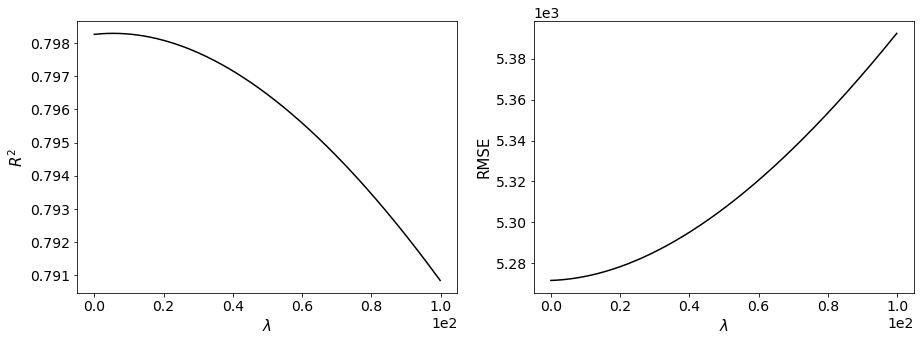

In [124]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(x=lambda_values,y=r2_cv10_values,color='k')
plt.ylabel('$R^2$',size=15)
plt.xlabel('$\lambda$',size=15)
plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,2))
plt.ticklabel_format(style='sci', axis='y', scilimits=(-2,2))
plt.subplot(1,2,2)
sns.lineplot(x=lambda_values,y=rmse_cv10_values,color='k')
plt.ylabel('RMSE',size=15)
plt.xlabel('$\lambda$',size=15)
plt.savefig('ridge_corss_val.pdf',bbox_inches='tight')
plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,2))
plt.ticklabel_format(style='sci', axis='y', scilimits=(-2,2))
plt.show()

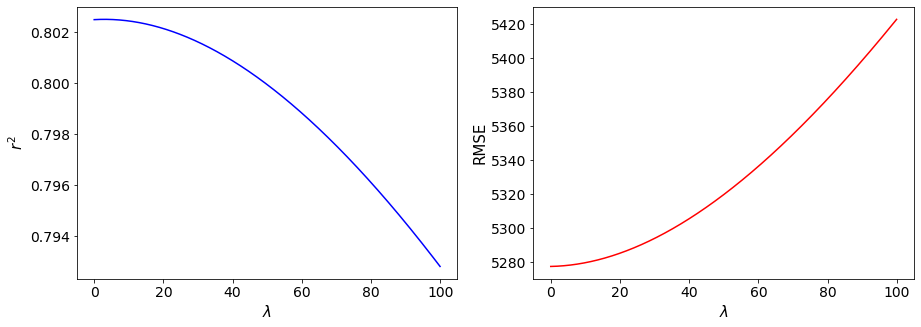

In [123]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(x=lambda_values,y=r2_cv5_values,color='b')
plt.ylabel('$r^2$',size=15)
plt.xlabel('$\lambda$',size=15)
plt.subplot(1,2,2)
sns.lineplot(x=lambda_values,y=rmse_cv5_values,color='r')
plt.ylabel('RMSE',size=15)
plt.xlabel('$\lambda$',size=15)
plt.show()

In [390]:
coefs = []
for lambda_value in np.arange(0,1000,0.1):
    ridge=hw.model_select('ridge',lambda_value).fit(X_train,hw.Y_train)
    coefs.append(ridge['ridge'].coef_[0])

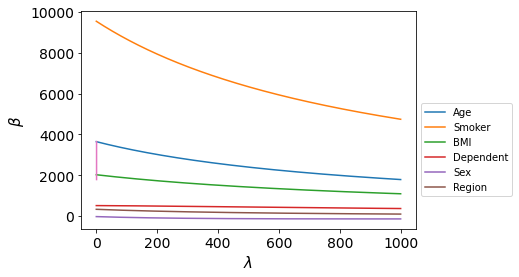

In [400]:

lambda_values = np.arange(0,1000,0.1)
plt.plot(lambda_values,np.array(coefs)[:,0],label='Age')
plt.plot(lambda_values,np.array(coefs)[:,1],label='Smoker')
plt.plot(lambda_values,np.array(coefs)[:,2],label='BMI')
plt.plot(lambda_values,np.array(coefs)[:,3],label='Dependent')
plt.plot(lambda_values,np.array(coefs)[:,4],label='Sex')
plt.plot(lambda_values,np.array(coefs)[:,5],label='Region')
plt.plot(0.9*np.ones(len(np.array(coefs)[:,5])),np.array(coefs)[:,0])
#plt.plot(lambda_values,np.array(coefs)[:,4],label='Sex')
plt.ylabel(r'$ \beta$ ',size=15)
plt.xlabel('$\lambda$',size=15)
plt.legend(bbox_to_anchor=[1, 0.6])
plt.savefig('Beta_ridge_regression.pdf',bbox_inches='tight')
plt.show()

## Lasso

In [129]:
lambda_values = np.arange(0.1,1000,1)
r2_cv5_values,r2_cv10_values,rmse_cv5_values,rmse_cv10_values=hw.cross_val('lasso',lambda_values,
                                                                           X_train,hw.Y_train)

In [130]:
index_lambda_r2   = r2_cv10_values.index(max(r2_cv10_values))
index_lambda_rmse = rmse_cv10_values.index(min(rmse_cv10_values))

print("For K-fold when k=10")

print(f'Lambda associated with Maximum R2: {lambda_values[index_lambda_r2]}, Maximum R2: {(max(r2_cv10_values))}')

print(f'Lambda associated with Minimum RMSE:{lambda_values[index_lambda_rmse]}, Minimum RMSE:{min(rmse_cv10_values)}')

For K-fold when k=10
Lambda associated with Maximum R2: 32.1, Maximum R2: 0.798274984993046
Lambda associated with Minimum RMSE:0.1, Minimum RMSE:5271.600610884723


In [131]:
index_lambda_r2   = r2_cv5_values.index(max(r2_cv5_values))
index_lambda_rmse = rmse_cv5_values.index(min(rmse_cv5_values))

print("For K-fold when k=5")

print(f'Lambda associated with Maximum R2: {lambda_values[index_lambda_r2]}, Maximum R2: {(max(r2_cv5_values))}')

print(f'Lambda associated with Minimum RMSE:{lambda_values[index_lambda_rmse]}, Minimum RMSE:{min(rmse_cv5_values)}')

For K-fold when k=5
Lambda associated with Maximum R2: 23.1, Maximum R2: 0.8024850763568697
Lambda associated with Minimum RMSE:0.1, Minimum RMSE:5277.568091694383


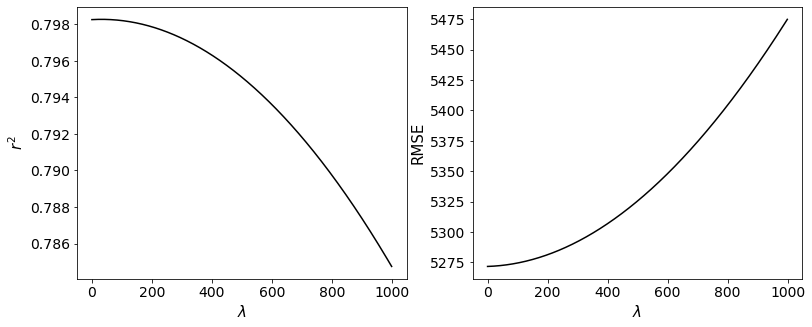

In [132]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.lineplot(x=lambda_values,y=r2_cv10_values,color='k')
plt.ylabel('$r^2$',size=15)
plt.xlabel('$\lambda$',size=15)
plt.subplot(1,2,2)
sns.lineplot(x=lambda_values,y=rmse_cv10_values,color='k')
plt.ylabel('RMSE',size=15)
plt.xlabel('$\lambda$',size=15)
plt.savefig('lasso_cross_val.pdf',bbox_inches='tight')
plt.show()

In [206]:
coefs = []
lambda_values = np.arange(0,100,0.1)
for lambda_value in lambda_values:
    ridge=hw.model_select('ridge',lambda_value).fit(X_train,hw.Y_train)
    coefs.append(ridge['ridge'].coef_[0])

lambda_values_lasso = np.arange(0.1,100,1)
coefs_lasso = []
for lambda_value in lambda_values_lasso:
    lasso=hw.model_select('lasso',lambda_value).fit(X_train,hw.Y_train)
    coefs_lasso.append(lasso['lasso'].coef_)
    

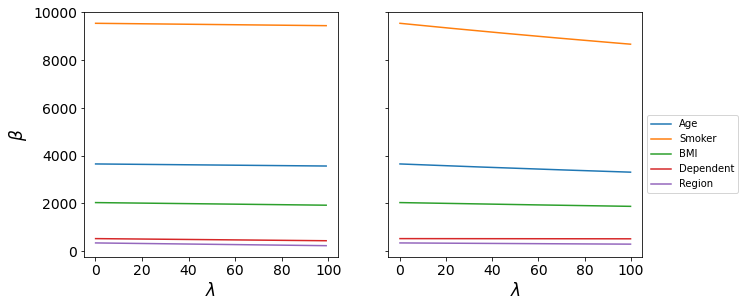

In [207]:
f, (ax1, ax2)=plt.subplots(1, 2, sharey='row')
f.set_figheight(4.5)
f.set_figwidth(10)

ax1.plot(lambda_values_lasso,np.array(coefs_lasso)[:,0],label='Age')
ax1.plot(lambda_values_lasso,np.array(coefs_lasso)[:,1],label='Smoker')
ax1.plot(lambda_values_lasso,np.array(coefs_lasso)[:,2],label='BMI')
ax1.plot(lambda_values_lasso,np.array(coefs_lasso)[:,3],label='Dependent')
ax1.plot(lambda_values_lasso,np.array(coefs_lasso)[:,4],label='Region')
ax1.set_xlabel('$\lambda$',size=17)
ax1.set_ylabel(r'$ \beta$ ',size=17)
ax2.plot(lambda_values,np.array(coefs)[:,0],label='Age')
ax2.plot(lambda_values,np.array(coefs)[:,1],label='Smoker')
ax2.plot(lambda_values,np.array(coefs)[:,2],label='BMI')
ax2.plot(lambda_values,np.array(coefs)[:,3],label='Dependent')
ax2.plot(lambda_values,np.array(coefs)[:,4],label='Region')
ax2.set_xlabel('$\lambda$',size=17)
plt.legend(bbox_to_anchor=[1, 0.6])
plt.savefig('Beta_ridge_regression.pdf',bbox_inches='tight')


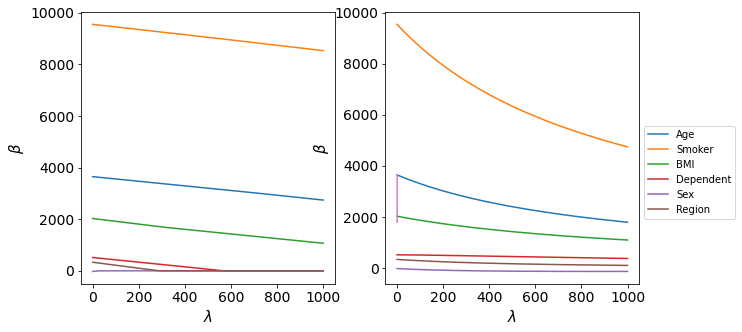

In [412]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(lambda_values_lasso,np.array(coefs_lasso)[:,0],label='Age')
plt.plot(lambda_values_lasso,np.array(coefs_lasso)[:,1],label='Smoker')
plt.plot(lambda_values_lasso,np.array(coefs_lasso)[:,2],label='BMI')
plt.plot(lambda_values_lasso,np.array(coefs_lasso)[:,3],label='Dependent')
plt.plot(lambda_values_lasso,np.array(coefs_lasso)[:,4],label='Sex')
plt.plot(lambda_values_lasso,np.array(coefs_lasso)[:,5],label='Region')
plt.ylabel(r'$ \beta$ ',size=15)
plt.xlabel('$\lambda$',size=15)
plt.subplot(1,2,2)
lambda_values = np.arange(0,1000,0.1)
plt.plot(lambda_values,np.array(coefs)[:,0],label='Age')
plt.plot(lambda_values,np.array(coefs)[:,1],label='Smoker')
plt.plot(lambda_values,np.array(coefs)[:,2],label='BMI')
plt.plot(lambda_values,np.array(coefs)[:,3],label='Dependent')
plt.plot(lambda_values,np.array(coefs)[:,4],label='Sex')
plt.plot(lambda_values,np.array(coefs)[:,5],label='Region')
plt.plot(0.9*np.ones(len(np.array(coefs)[:,5])),np.array(coefs)[:,0])
#plt.plot(lambda_values,np.array(coefs)[:,4],label='Sex')
plt.ylabel(r'$ \beta$ ',size=15)
plt.xlabel('$\lambda$',size=15)
plt.legend(bbox_to_anchor=[1, 0.6])
plt.savefig('Beta_ridge_regression.pdf',bbox_inches='tight')
plt.show()

# PCR and PLS

In [133]:
pca = PCA(n_components=6)
pc_values = pca.fit_transform(StandardScaler().fit_transform(df_X_train[['age','smoker','bmi','children','region','sex']]))

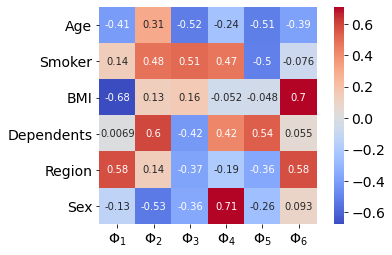

In [134]:
sns.heatmap(pca.components_.T,cmap='coolwarm',
            yticklabels = ['Age','Smoker','BMI','Dependents','Region','Sex'],
            xticklabels = ['$\Phi_1$','$\Phi_2$','$\Phi_3$','$\Phi_4$','$\Phi_5$','$\Phi_6$'],
            square=True,annot=True)


plt.savefig('PCR_heatmap.pdf',bbox_inches='tight')

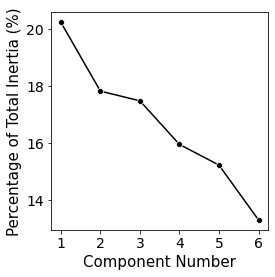

In [135]:
x=sns.lineplot(x=np.arange(1,7,1),y=pca.explained_variance_ratio_*100,color='k',marker='o')
plt.xticks(np.arange(1,7,1))
plt.xlabel('Component Number',size=15)
plt.ylabel('Percentage of Total Inertia (%)',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.savefig('variance_pcr.pdf',bbox_inches='tight')
plt.show()

In [136]:
r2_cv_5 = []
rmse_cv_5 = []
for i in range(1,7):
    X_train_pcr = pc_values[:,0:i]
    r2,rmse=hw.model_cv(5,LinearRegression(),X_train_pcr,hw.Y_train)
    rmse_cv_5.append(rmse)
    r2_cv_5.append(r2)
    
r2_cv_10 = []
rmse_cv_10 = []
for i in range(1,7):
    X_train_pcr = pc_values[:,0:i]
    r2,rmse=hw.model_cv(10,LinearRegression(),X_train_pcr,hw.Y_train)
    rmse_cv_10.append(rmse)
    r2_cv_10.append(r2)

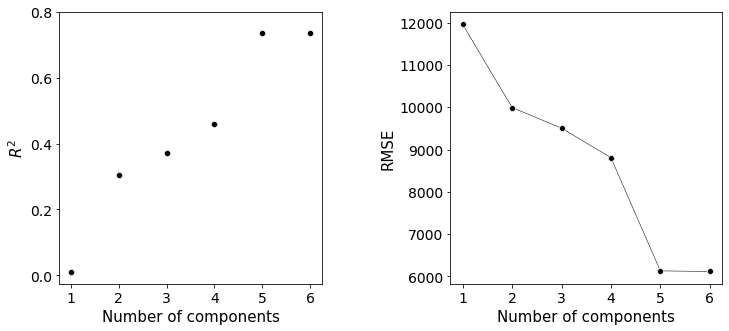

In [377]:
#sns.scatterplot(y=rmse_cv_5,x=np.arange(1,7,1))
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
x=sns.scatterplot(x=np.arange(1,7,1),y=r2_cv_5,color='k')
plt.xlabel('Number of components',size=15)
plt.ylabel('$R^2$',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.xticks(np.arange(1,7,1))
plt.yticks(np.arange(0,1,0.2))
plt.subplot(1,2,2)

x=sns.scatterplot(x=np.arange(1,7,1),y=rmse_cv_5,color='k')
sns.lineplot(x=np.arange(1,7,1),y=rmse_cv_5,color='k',marker='o',linewidth=0.5)
plt.xlabel('Number of components',size=15)
plt.ylabel('RMSE',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.xticks(np.arange(1,7,1))
#plt.yticks(np.arange(0,1,0.2))


plt.savefig('R2_RMSE_components.pdf',bbox_inches='tight')
plt.show()

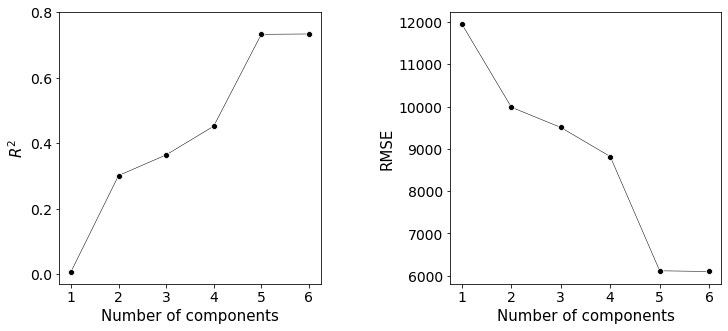

In [378]:
#sns.scatterplot(y=rmse_cv_5,x=np.arange(1,7,1))
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
x=sns.lineplot(x=np.arange(1,7,1),y=r2_cv_10,color='k',marker='o',linewidth=0.5)
plt.xlabel('Number of components',size=15)
plt.ylabel('$R^2$',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.xticks(np.arange(1,7,1))
plt.yticks(np.arange(0,1,0.2))
plt.subplot(1,2,2)

x=sns.lineplot(x=np.arange(1,7,1),y=rmse_cv_10,color='k',marker='o',linewidth=0.5)
plt.xlabel('Number of components',size=15)
plt.ylabel('RMSE',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.xticks(np.arange(1,7,1))
#plt.yticks(np.arange(0,1,0.2))


plt.savefig('R2_RMSE_components_cv10.pdf',bbox_inches='tight')
plt.show()

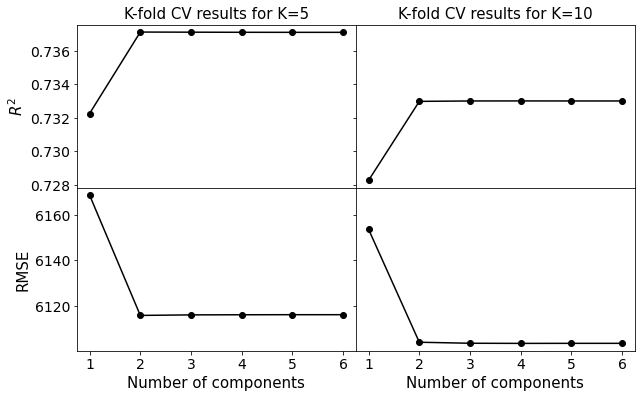

In [137]:
f, (ax1, ax2)=plt.subplots(2, 2, sharey='row',sharex='col')
f.set_figheight(6)
f.set_figwidth(10)
ax1[0].plot(np.arange(1,7,1),r2_cv_5,color='k',marker='o')
ax1[1].plot(np.arange(1,7,1),r2_cv_10,color='k',marker='o')
ax1[0].set_ylabel('$R^2$',size=15)
ax2[0].set_ylabel('RMSE',size=15)
ax1[0].set_title('K-fold CV results for K=5',size=15)
ax1[1].set_title('K-fold CV results for K=10',size=15)

ax2[0].plot(np.arange(1,7,1),rmse_cv_5,color='k',marker='o')
ax2[1].plot(np.arange(1,7,1),rmse_cv_10,color='k',marker='o')

ax2[0].set_xlabel('Number of components',size=15)
ax2[1].set_xlabel('Number of components',size=15)

ax2[0].set_xticks(np.arange(1,7,1))
ax2[1].set_xticks(np.arange(1,7,1))


plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('pcr_cross_val.pdf',bbox_inches='tight')

In [151]:
y.reshape(-1,1)

array([[ 15778.65156177],
       [ 17026.62005777],
       [ 20540.58521504],
       [  8312.78209506],
       [ -7431.18115166],
       [ 11766.01185059],
       [ 13705.07382599],
       [  9676.57495089],
       [ 11711.93028305],
       [  8548.16744722],
       [ 10123.02665603],
       [  5395.69077719],
       [ 21239.35732475],
       [  5150.324073  ],
       [  8291.85978261],
       [  5765.63233924],
       [ 24638.58369582],
       [ 19641.58806165],
       [ 26518.65776068],
       [ 14430.85315416],
       [ 14914.87860002],
       [ 17027.57466716],
       [  9693.78044051],
       [  5093.01052745],
       [ 22752.15899205],
       [ 15945.25628541],
       [ 34394.68636503],
       [ 15567.05077347],
       [ 16052.09523453],
       [  3716.58621447],
       [ 31486.12987727],
       [ 22745.66706187],
       [ 17355.29312459],
       [ 18701.7304943 ],
       [ 12230.64846635],
       [ -2005.05586222],
       [ 25344.83370444],
       [ 30987.94433535],
       [ 180

In [153]:
pcr=LinearRegression().fit(pc_values[:,0:7],hw.Y_train)
pc_test=PCA(n_components=6).fit_transform(StandardScaler().fit_transform(df_X_test[['age','smoker','bmi',
                                                   'children','region','sex']].values))
y=pcr.predict(pc_test[:,0:7])
mse(hw.Y_test,y)**0.5

17095.308665153265

In [155]:
from sklearn.pipeline import make_pipeline

In [158]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=6), LinearRegression())

In [159]:
pcr.fit(df_X_train[['age','smoker','bmi','children','region','sex']],hw.Y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=6,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [160]:
pcr.score(df_X_test[['age','smoker','bmi','children','region','sex']],hw.Y_test)

0.7668905583460907

In [162]:
y=pcr.predict(df_X_test[['age','smoker','bmi','children','region','sex']])
mse(hw.Y_test,y)**0.5

5930.779824530081

In [7]:
plt.figure(figsize=(10,5))
pls = PLSRegression(n_components=6)
pls.fit(df_X_train[['age','smoker','bmi',
                                                   'children','region','sex']],hw.Y_train)
sns.heatmap(pls.x_weights_,cmap='coolwarm',
            yticklabels = ['Age','Smoker','BMI','Dependents','Region','Sex'],
            xticklabels = ['$\Phi_1$','$\Phi_2$','$\Phi_3$','$\Phi_4$','$\Phi_5$','$\Phi_6$'],
            square=True,annot=True)


plt.savefig('PLS_heatmap.pdf',bbox_inches='tight')

NameError: name 'df_X_train' is not defined

<Figure size 720x360 with 0 Axes>

In [226]:
pls.coef_

array([[3648.35533738],
       [9547.82322635],
       [2026.76955748],
       [ 515.00260268],
       [ 333.57437086],
       [ -24.08363214]])

In [113]:
r2_cv_5 = []
rmse_cv_5 = []
for n_c in range(1,7):
    pls = PLSRegression(n_components=n_c)
    r2,rmse=hw.model_cv(5,pls,StandardScaler().fit_transform(df_X_train[['age','smoker','bmi','children','region','sex']]),hw.Y_train)
    rmse_cv_5.append(rmse)
    r2_cv_5.append(r2)

r2_cv_10 = []
rmse_cv_10 = []
for n_c in range(1,7):
    pls = PLSRegression(n_components=n_c)
    r2,rmse=hw.model_cv(10,pls,StandardScaler().fit_transform(df_X_train[['age','smoker','bmi','children','region','sex']]),hw.Y_train)
    rmse_cv_10.append(rmse)
    r2_cv_10.append(r2)

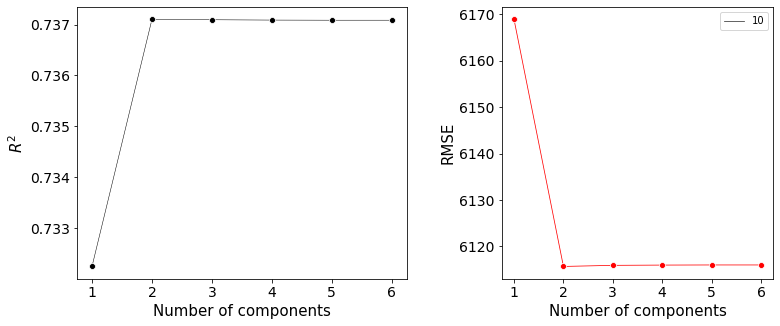

In [117]:
#sns.scatterplot(y=rmse_cv_5,x=np.arange(1,7,1))
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
x=sns.lineplot(x=np.arange(1,7,1),y=r2_cv_5,color='k',marker='o',linewidth=0.5)
plt.xlabel('Number of components',size=15)
plt.ylabel('$R^2$',size=15)

plt.subplot(1,2,2)

x=sns.lineplot(x=np.arange(1,7,1),y=rmse_cv_5,marker='o',linewidth=0.5,color='r',size=10)
plt.xlabel('Number of components',size=15)
plt.ylabel('RMSE',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.xticks(np.arange(1,7,1))
#plt.yticks(np.arange(0,1,0.2))


plt.savefig('R2_RMSE_components_cv5_PLS.pdf',bbox_inches='tight')
plt.show()

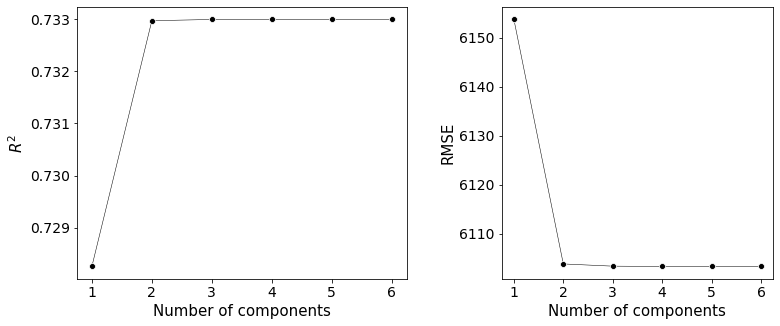

In [115]:
#sns.scatterplot(y=rmse_cv_5,x=np.arange(1,7,1))
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
x=sns.lineplot(x=np.arange(1,7,1),y=r2_cv_10,color='k',marker='o',linewidth=0.5)
plt.xlabel('Number of components',size=15)
plt.ylabel('$R^2$',size=15)

plt.subplot(1,2,2)

x=sns.lineplot(x=np.arange(1,7,1),y=rmse_cv_10,color='k',marker='o',linewidth=0.5)
plt.xlabel('Number of components',size=15)
plt.ylabel('RMSE',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.xticks(np.arange(1,7,1))
#plt.yticks(np.arange(0,1,0.2))


plt.savefig('R2_RMSE_components_cv10_PLS.pdf',bbox_inches='tight')
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'yticks'

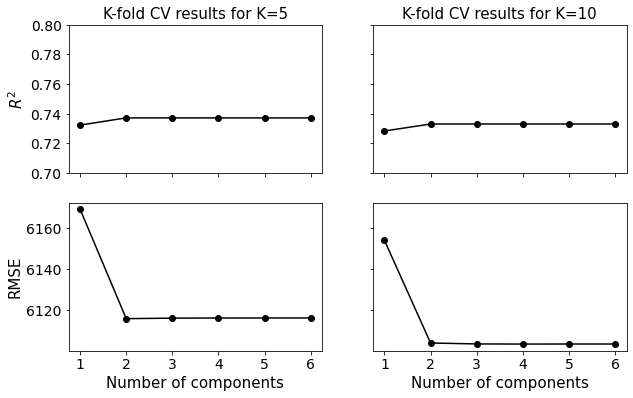

In [129]:
f, (ax1, ax2)=plt.subplots(2, 2, sharey='row',sharex='col')
f.set_figheight(6)
f.set_figwidth(10)
ax1[0].plot(np.arange(1,7,1),r2_cv_5,color='k',marker='o')
ax1[1].plot(np.arange(1,7,1),r2_cv_10,color='k',marker='o')
ax1[0].set_ylabel('$R^2$',size=15)
ax2[0].set_ylabel('RMSE',size=15)
ax1[0].set_title('K-fold CV results for K=5',size=15)
ax1[1].set_title('K-fold CV results for K=10',size=15)

ax2[0].plot(np.arange(1,7,1),rmse_cv_5,color='k',marker='o')
ax2[1].plot(np.arange(1,7,1),rmse_cv_10,color='k',marker='o')

ax2[0].set_xlabel('Number of components',size=15)
ax2[1].set_xlabel('Number of components',size=15)

ax2[0].set_xticks(np.arange(1,7,1))
ax2[1].set_xticks(np.arange(1,7,1))
ax1[0].set_yticks(np.arange(0.7,0.8,0.02))
ax1[1].set_yticks(np.arange(0.7,0.8,0.02))

ax2[1].set_yticks(np.arange())

plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('pls_cross_val.pdf',bbox_inches='tight')

In [361]:
pls = PLSRegression(n_components=2,max_iter=10**8)

In [362]:
pls.fit(df_X_train[['age','smoker','bmi',
                                                   'children','region','sex']],np.log(hw.Y_train))

PLSRegression(copy=True, max_iter=100000000, n_components=2, scale=True,
              tol=1e-06)

In [363]:
y_predict=pls.predict(df_X_test[['age','smoker','bmi',
                                'children','region','sex']])

In [364]:
pls_values=pls.transform(df_X_test[['age','smoker','bmi',
                        'children','region','sex']])

In [365]:
mse(np.log(hw.Y_test[:,0]),y_predict)**0.5

0.43887792184519164

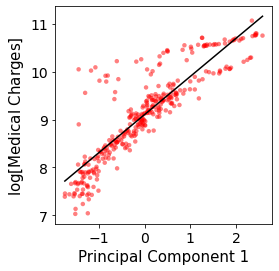

In [360]:
plt.subplot(1,2,1)
sns.lineplot(x=pls_values_linear[:,0],y=y_predict_linear[:,0],color='k')
x=sns.scatterplot(x=pls_values[:,0],y=np.log(hw.Y_test[:,0]),color='r',
                             edgecolor='none',s=20,marker='o',alpha=0.5)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.xlabel('Principal Component 1',size=15)
plt.ylabel('Medical Charges',size=15)

plt.subplot(1,2,2)
sns.lineplot(x=pls_values[:,0],y=y_predict[:,0],color='k')
x=sns.scatterplot(x=pls_values[:,0],y=np.log(hw.Y_test[:,0]),color='r',
                             edgecolor='none',s=20,marker='o',alpha=0.5)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.xlabel('Principal Component 1',size=15)
plt.ylabel('$\log$[Medical Charges]',size=15)
plt.savefig('log_pls_transform',bbox_inches='tight')
plt.show()

In [366]:
pls.score(df_X_test[['age','smoker','bmi','children','region','sex']],np.log(hw.Y_test))

0.7770683546501764